In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Qyelp = pd.read_json("C:/Users/justy/Documents/GitHub/inf553-adjusted-ratings/dataset-extraction/thousand.json")

In [21]:
print("Unique businesses: %d" % len(Qyelp['business_id'].unique()))
print("Unique users: %d" % len(Qyelp['user_id'].unique()))
Qyelp.head(3)

Unique businesses: 972
Unique users: 188


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g


In [22]:
# Create metrics per user
DCount = Qyelp.groupby('user_id')['review_id'].count().to_dict()
DAvg = Qyelp.groupby('user_id')['stars'].mean().to_dict()
DMed = Qyelp.groupby('user_id')['stars'].median().to_dict()
DMin = Qyelp.groupby('user_id')['stars'].min().to_dict()
DMax = Qyelp.groupby('user_id')['stars'].max().to_dict()
DStd = Qyelp.groupby('user_id')['stars'].std().to_dict()

QDist = pd.DataFrame(Qyelp['user_id'].unique(), columns=['user_id'])
print('Number of Users: %d' % len(QDist))
QDist['Reviews'] = QDist['user_id'].map(DCount)
QDist['Mean'] = QDist['user_id'].map(DAvg)
QDist['Std Dev'] = QDist['user_id'].map(DStd)
QDist['Max'] = QDist['user_id'].map(DMax)
QDist['Median'] = QDist['user_id'].map(DMed)
QDist['Min'] = QDist['user_id'].map(DMin)

QDist.head(5)

Number of Users: 188


,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,10,3.2,1.751190,5,3.0,1
1,TlvV-xJhmh7LCwJYXkV-cg,1,5.0,NaN,5,5.0,5
2,NhOc64RsrTT1Dls50yYW8g,2,3.0,2.828427,5,3.0,1
3,LKcdcMrq2xDzIThSHiZmLg,1,4.0,NaN,4,4.0,4
4,hxqo4NyJFfeOmuoVi--s1A,1,5.0,NaN,5,5.0,5


In [23]:
# Output results to json file
json = QDist.to_json("user_summary.json", orient='records')


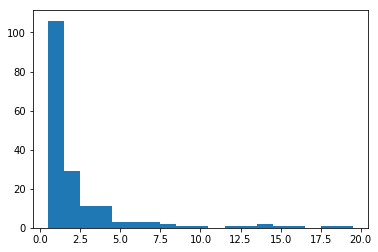

In [24]:
plt.hist(QDist['Reviews'], bins=np.arange(0.5,20.5,1))
plt.show()

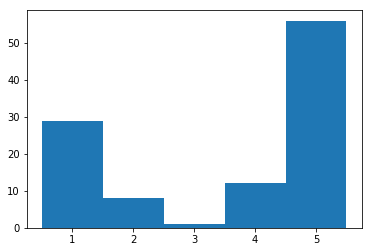

In [25]:
plt.hist(QDist[QDist['Reviews'] == 1]['Mean'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.show()

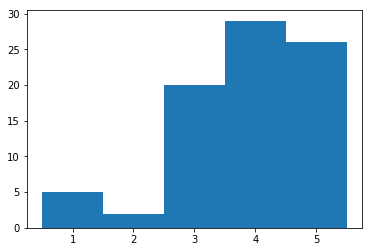

In [26]:
plt.hist(QDist[QDist['Reviews'] >= 2]['Mean'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.show()

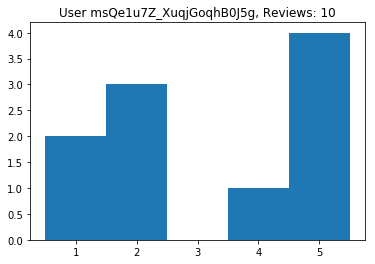

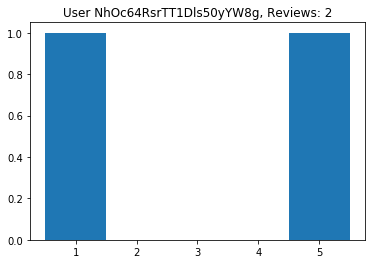

In [ ]:
for user in QDist[QDist['Reviews']>1]['user_id']:
    plt.hist(Qyelp[Qyelp['user_id']==user]['stars'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
    plt.title("User %s, Reviews: %d" % (user, QDist[QDist['user_id']==user]['Reviews']))
    plt.show()

In [13]:

QDist.head(5)

,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,10,3.2,1.751190,5,3.0,1
1,TlvV-xJhmh7LCwJYXkV-cg,1,5.0,NaN,5,5.0,5
2,NhOc64RsrTT1Dls50yYW8g,2,3.0,2.828427,5,3.0,1
3,LKcdcMrq2xDzIThSHiZmLg,1,4.0,NaN,4,4.0,4
4,hxqo4NyJFfeOmuoVi--s1A,1,5.0,NaN,5,5.0,5


In [14]:
Qyelp['Mean'] = Qyelp['user_id'].map(DAvg)
Qyelp['Std'] = Qyelp['user_id'].map(DStd)
Qyelp['Count'] = Qyelp['user_id'].map(DCount)
Qyelp['T-score'] = (Qyelp['stars'] - Qyelp['Mean']) / (Qyelp['Std'] / np.sqrt(Qyelp['Count']) )
Qyelp.head(5)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,Mean,Std,Count,T-score
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,3.2,1.75119,10,-2.166945
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,3.2,1.75119,10,3.250418
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,3.2,1.75119,10,-3.972733
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,3.2,1.75119,10,-2.166945
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,3.2,1.75119,10,3.250418


In [15]:
print("Users with average review between 2.5 and 3.5: %d" % len(Qyelp[(Qyelp['Mean'] < 3.5) & (Qyelp['Mean'] > 2.5)]['user_id'].unique()))
print("Users with average review above 3.5: %d" % len(Qyelp[Qyelp['Mean'] > 3.5]['user_id'].unique()))
print("Users with average review below 2.5: %d" % len(Qyelp[Qyelp['Mean'] < 2.5]['user_id'].unique()))

Users with average review between 2.5 and 3.5: 20
Users with average review above 3.5: 120
Users with average review below 2.5: 44


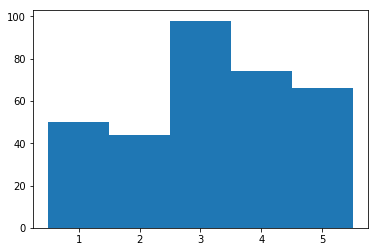

In [16]:
plt.hist(Qyelp[(Qyelp['Mean'] < 3.5) & (Qyelp['Mean'] > 2.5)]['stars'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.show()

In [17]:
Qyelp['T-score'] = Qyelp['T-score'].fillna(0.0)

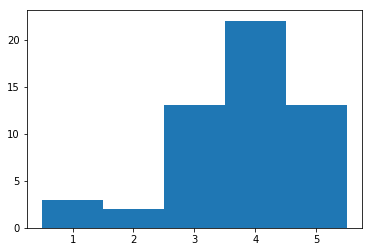

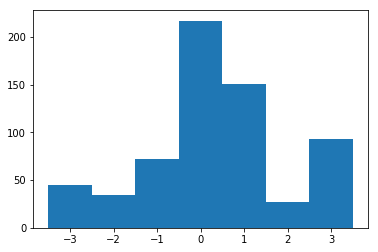

In [18]:
plt.hist(QDist[QDist['Reviews'] >= 3]['Mean'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.show()
plt.hist(Qyelp['T-score'], bins=[-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5])
plt.show()

In [134]:
Qyelp.head(3)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,Mean,Std,T-score
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,3.2,1.75119,-0.685248
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,3.2,1.75119,1.027872
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,3.2,1.75119,-1.256289


In [211]:
QyelpHigh = Qyelp[Qyelp['stars'] >= 3]
QyelpLow = Qyelp[Qyelp['stars'] <= 2]
QyelpLow2 = Qyelp[Qyelp['stars'] <= 3]

print('There are %d reviews 3 and above' % len(QyelpHigh))
print('There are %d reviews 2 and below' % len(QyelpLow))
print('There are %d reviews 3 and below' % len(QyelpLow2))

There are 798 reviews 3 and above
There are 202 reviews 2 and below
There are 375 reviews 3 and below


In [213]:
# Create metrics per user
DCountHigh = QyelpHigh.groupby('user_id')['review_id'].count().to_dict()
DAvgHigh = QyelpHigh.groupby('user_id')['stars'].mean().to_dict()
DMedHigh = QyelpHigh.groupby('user_id')['stars'].median().to_dict()
DMinHigh = QyelpHigh.groupby('user_id')['stars'].min().to_dict()
DMaxHigh = QyelpHigh.groupby('user_id')['stars'].max().to_dict()
DStdHigh = QyelpHigh.groupby('user_id')['stars'].std().to_dict()

QdistHigh = pd.DataFrame(QyelpHigh['user_id'].unique(), columns=['user_id'])
print('Number of Users: %d' % len(QdistHigh))
QdistHigh['Reviews'] = QdistHigh['user_id'].map(DCountHigh)
QdistHigh['Mean'] = QdistHigh['user_id'].map(DAvgHigh)
QdistHigh['Std Dev'] = QdistHigh['user_id'].map(DStdHigh)
QdistHigh['Max'] = QdistHigh['user_id'].map(DMaxHigh)
QdistHigh['Median'] = QdistHigh['user_id'].map(DMedHigh)
QdistHigh['Min'] = QdistHigh['user_id'].map(DMinHigh)

QdistHigh.head(5)

Number of Users: 146


,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,5,4.8,0.447214,5,5.0,4
1,TlvV-xJhmh7LCwJYXkV-cg,1,5.0,NaN,5,5.0,5
2,NhOc64RsrTT1Dls50yYW8g,1,5.0,NaN,5,5.0,5
3,LKcdcMrq2xDzIThSHiZmLg,1,4.0,NaN,4,4.0,4
4,hxqo4NyJFfeOmuoVi--s1A,1,5.0,NaN,5,5.0,5


In [214]:
# Create metrics per user
DCountLow = QyelpLow.groupby('user_id')['review_id'].count().to_dict()
DAvgLow = QyelpLow.groupby('user_id')['stars'].mean().to_dict()
DMedLow = QyelpLow.groupby('user_id')['stars'].median().to_dict()
DMinLow = QyelpLow.groupby('user_id')['stars'].min().to_dict()
DMaxLow = QyelpLow.groupby('user_id')['stars'].max().to_dict()
DStdLow = QyelpLow.groupby('user_id')['stars'].std().to_dict()

QdistLow = pd.DataFrame(QyelpLow['user_id'].unique(), columns=['user_id'])
print('Number of Users: %d' % len(QdistLow))
QdistLow['Reviews'] = QdistLow['user_id'].map(DCountLow)
QdistLow['Mean'] = QdistLow['user_id'].map(DAvgLow)
QdistLow['Std Dev'] = QdistLow['user_id'].map(DStdLow)
QdistLow['Max'] = QdistLow['user_id'].map(DMaxLow)
QdistLow['Median'] = QdistLow['user_id'].map(DMedLow)
QdistLow['Min'] = QdistLow['user_id'].map(DMinLow)

QdistLow.head(5)

Number of Users: 86


,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,5,1.6,0.547723,2,2,1
1,NhOc64RsrTT1Dls50yYW8g,1,1.0,NaN,1,1,1
2,5ngpW5tf3ep680eG1HxHzA,1,2.0,NaN,2,2,2
3,eAavwM32i2h7sNNer--kGw,1,1.0,NaN,1,1,1
4,Fc_nb6N6Sdurqb-rwsY1Bw,2,1.0,0.000000,1,1,1


In [215]:
QyelpHigh['Mean'] = QyelpHigh['user_id'].map(DAvgHigh)
QyelpHigh['Std'] = QyelpHigh['user_id'].map(DStdHigh)
QyelpHigh['Count'] = QyelpHigh['user_id'].map(DCountHigh)
QyelpHigh['T-score'] = (QyelpHigh['stars'] - QyelpHigh['Mean']) / (QyelpHigh['Std'] / np.sqrt(QyelpHigh['Count']) )
QyelpHigh.head(5)

C:\Users\justy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\justy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\justy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,Mean,Std,Count,T-score
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,4.8,0.447214,5,1.0
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,4.8,0.447214,5,1.0
6,AxeQEz3-s9_1TyIo-G7UQw,0,2011-10-10,0,brokEno2n7s4vrwmmUdr9w,5,"If you like Thai food, you have to try the ori...",1,msQe1u7Z_XuqjGoqhB0J5g,4.8,0.447214,5,1.0
7,zdE82PiD6wquvjYLyhOJNA,0,2012-04-18,1,kUZWBVZvhWuC8TWUg5AYyA,5,AMAZING!!!\n\n I was referred here by a friend...,0,msQe1u7Z_XuqjGoqhB0J5g,4.8,0.447214,5,1.0
8,EAwh1OmG6t6p3nRaZOW_AA,0,2011-02-25,0,wcqt0III88LEcm19IxFFyA,4,Ribs = amazing\n2 hour wait time= not so amazi...,0,msQe1u7Z_XuqjGoqhB0J5g,4.8,0.447214,5,-4.0


In [216]:
QyelpLow['Mean'] = QyelpLow['user_id'].map(DAvgLow)
QyelpLow['Std'] = QyelpLow['user_id'].map(DStdLow)
QyelpLow['Count'] = QyelpLow['user_id'].map(DCountLow)
QyelpLow['T-score'] = (QyelpLow['stars'] - QyelpLow['Mean']) / (QyelpLow['Std'] / np.sqrt(QyelpLow['Count']) )
QyelpLow.head(5)

C:\Users\justy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\justy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\justy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,Mean,Std,Count,T-score
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,1.6,0.547723,5,1.632993
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,1.6,0.547723,5,-2.449490
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,1.6,0.547723,5,1.632993
5,vgfcTvK81oD4r50NMjU2Ag,0,2011-02-25,0,pfavA0hr3nyqO61oupj-lA,1,This place sucks. The customer service is horr...,2,msQe1u7Z_XuqjGoqhB0J5g,1.6,0.547723,5,-2.449490
9,atVh8viqTj-sqDJ35tAYVg,1,2012-11-09,2,LWUtqzNthMM3vpWZIFBlPw,2,"Food is pretty good, not gonna lie. BUT you ha...",1,msQe1u7Z_XuqjGoqhB0J5g,1.6,0.547723,5,1.632993


In [225]:
QdistLow.head(10)

,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,5,1.600000,0.547723,2,2,1
1,NhOc64RsrTT1Dls50yYW8g,1,1.000000,NaN,1,1,1
2,5ngpW5tf3ep680eG1HxHzA,1,2.000000,NaN,2,2,2
3,eAavwM32i2h7sNNer--kGw,1,1.000000,NaN,1,1,1
4,Fc_nb6N6Sdurqb-rwsY1Bw,2,1.000000,0.000000,1,1,1
5,B7Fh30KQT1xPSGt_pIhRRA,1,2.000000,NaN,2,2,2
6,FCtoTo9zSH1cSAkascfEHw,1,1.000000,NaN,1,1,1
7,Ka7TIp74VHSa90rfdg4_2g,1,1.000000,NaN,1,1,1
8,0pf5VuzE4_1pwj5NJHG5TQ,9,1.555556,0.527046,2,2,1
9,AYYKxiTdfsPIOBo3MqfAUg,1,1.000000,NaN,1,1,1


In [224]:
QdistHigh.head(10)

,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,5,4.80,0.447214,5,5.0,4
1,TlvV-xJhmh7LCwJYXkV-cg,1,5.00,NaN,5,5.0,5
2,NhOc64RsrTT1Dls50yYW8g,1,5.00,NaN,5,5.0,5
3,LKcdcMrq2xDzIThSHiZmLg,1,4.00,NaN,4,4.0,4
4,hxqo4NyJFfeOmuoVi--s1A,1,5.00,NaN,5,5.0,5
5,eG6HneK9zLcuZpVuKcsCGQ,4,4.75,0.500000,5,5.0,4
6,5ngpW5tf3ep680eG1HxHzA,3,5.00,0.000000,5,5.0,5
7,nqzeKqdWBruvdgMd6aBHrg,1,5.00,NaN,5,5.0,5
8,G22ITfVETYHtIhnn5lLRrQ,1,5.00,NaN,5,5.0,5
9,FjH3TH8OvHGLNEbzdEYlNg,4,4.75,0.500000,5,5.0,4


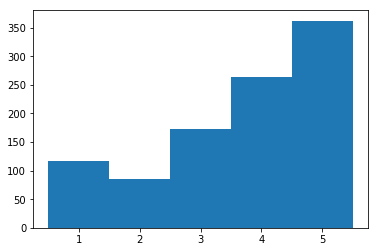

In [220]:
plt.hist(Qyelp['stars'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.show()